<a href="https://colab.research.google.com/github/aneesh98/Insincere-Question-Classification/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############## DATA SETUP ##############
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c quora-insincere-questions-classification

 90% 49.0M/54.4M [00:00<00:00, 36.3MB/s]
100% 54.4M/54.4M [00:00<00:00, 69.7MB/s]
100% 5.94G/5.96G [01:10<00:00, 76.2MB/s]
100% 5.96G/5.96G [01:10<00:00, 90.4MB/s]
100% 4.08M/4.08M [00:00<00:00, 40.3MB/s]

 32% 5.00M/15.7M [00:00<00:00, 36.2MB/s]
100% 15.7M/15.7M [00:00<00:00, 61.4MB/s]


In [3]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [39]:
############# ALL IMPORT STATEMENTS ##############
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk 
nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
train = pd.read_csv('train.csv')
negative_texts = train[train['target']==1].head()
for k in range(5):
  print(negative_texts.iloc[k, 1])

Has the United States become the largest dictatorship in the world?
Which babies are more sweeter to their parents? Dark skin babies or light skin babies?
If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?
I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?
Which races have the smallest penis?


In [0]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
import re

In [48]:
class TextProcessor:
  def __init__(self):
    pass

  def expand_contractions(self, text, contraction_map = CONTRACTION_MAP):
    pattern = re.compile('({})'.format('|'.join(contraction_map.keys())), flags = re.IGNORECASE | re.DOTALL)
    def expand_match(contraction):
      match = contraction.group(0)
      print("GROUP ", match)
      first_char = match[0]
      expanded_contraction = contraction_map.get(match) if contraction_map.get(match) else contraction_map.get(match.lower())
      expanded_contraction = first_char + expanded_contraction[1:]
      return expanded_contraction
    expanded_text = pattern.sub(expand_match, text)
    # print(expanded_text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

  def remove_special_characters(self, text, remove_digits = False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern,'', text)
    return text
  
  def lower_all(self, text):
    return text.lower()

  def remove_stopwords(self, text):
    GAP_PATTERN = r'\s+'
    # nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words('english')
    regex_wt = nltk.RegexpTokenizer(pattern=GAP_PATTERN, gaps = True).tokenize
    tokens = regex_wt(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

  def pipeline(self, text):
    text = self.expand_contractions(text)
    text = self.remove_special_characters(text)
    text = self.lower_all(text)
    text = self.remove_stopwords(text)
    return text

string = "Y'all can't expand contractions the I'd think %%@@###???"
tp = TextProcessor()
tp.pipeline(string)

GROUP  Y'all
GROUP  can't
GROUP  I'd


'cannot expand contractions would think'

In [0]:
default_wt = nltk.word_tokenize
treebank_wt = nltk.TreebankWordTokenizer()
default_words = []
treebank_words =[]

for j in range(5):
  default_words.append(regex_wt(negative_texts.iloc[j,1]))
  treebank_words.append(treebank_wt.tokenize(negative_texts.iloc[j,1]))
print(default_words)
print(treebank_words)

In [0]:
tproc = TextProcessor()
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense
data = train
max_features = 50000
maxlen = 20
X = data['question_text']
y = data['target']
for j in range(X.shape[0]):
  if j%100==0:
    print(j,"/",X.shape[0]," Done")
  X[j] = tproc.pipeline(X[j])



In [0]:
from keras.layers import Embedding
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from sklearn.pipeline import Pipeline, make_pipeline


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class MyModel(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.max_words = 50000
    self.max_len = 20
    self.emb_dim = 10
    self.epochs = 10
    self.batch_size = 32
    self.validation_split = 0.2
    self.tokenizer = Tokenizer(num_words = self.max_len)
    self.model = self.model()

  def model(self): 
    model = Sequential()
    model.add(Embedding(self.max_words, self.emb_dim, input_length = self.max_len))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['acc'])
    return model
  
  def pad_sequence(self, texts):
    sequence = preprocessing.sequence.pad_sequences(texts, maxlen = self.max_len)
    return sequence
  
  def tokenize_text(self, texts):
    return self.tokenizer.texts_to_sequences(texts)

  def transform(self, texts):
    texts = self.tokenize_text(texts)
    texts = self.pad_sequence(texts)
    return texts

  def predict(self, text):
    text = self.transform(text)
    return self.model.predict(text)
  
  def predict_proba(self, text):
    text = self.transform(text)
    return self.model.predict(text)
  
  def fit(self, X, y):
    ohe = OneHotEncoder()
    y = np.array(y).reshape(-1,1)
    y = ohe.fit_transform(y).toarray()
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    self.tokenizer.fit_on_texts(x_train)
    x_train = self.transform(x_train)
    history = self.model.fit(x_train, y_train, epochs = self.epochs, batch_size = self.batch_size, validation_split=self.validation_split)
    return history


In [114]:
x = np.array([1,1,1,2,2])
ohe = OneHotEncoder()
x = ohe.fit_transform(x.reshape(-1,1)).toarray()
print(x)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [124]:
new_model = MyModel()
history = new_model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 783672 samples, validate on 195919 samples
Epoch 1/10
783672/783672 [==============================] - 81s 104us/step - loss: 0.1963 - acc: 0.9379 - val_loss: 0.1944 - val_acc: 0.9384
Epoch 2/10
783672/783672 [==============================] - 81s 103us/step - loss: 0.1946 - acc: 0.9381 - val_loss: 0.1942 - val_acc: 0.9384
Epoch 3/10
783672/783672 [==============================] - 80s 103us/step - loss: 0.1946 - acc: 0.9381 - val_loss: 0.1944 - val_acc: 0.9385
Epoch 4/10
783672/783672 [==============================] - 80s 102us/step - loss: 0.1945 - acc: 0.9382 - val_loss: 0.1939 - val_acc: 0.9385
Epoch 5/10
783672/783672 [==============================] - 79s 101us/step - loss: 0.1944 - acc: 0.9382 - val_loss: 0.1964 - val_acc: 0.9381
Epoch 6/10
783672/783672 [==============================] - 80s 102us/step - loss: 0.1944 - acc: 0.9382 - val_loss: 0.1940 - val_acc: 0.9384
Epoch 7/10
783672/783672 [==============================] - 80s 102us/step - loss: 0.1943 - acc: 0.938

<Figure size 432x288 with 0 Axes>

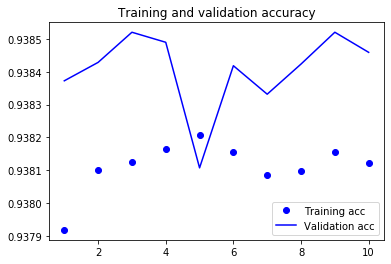

<Figure size 432x288 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [127]:
test_text = ["Should People be alive or should they die horrible death?"]
val = new_model.predict(test_text[0])
print(val)

[[0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.94169587 0.05830408]
 [0.9380862  0.06191375]
 [0.96204644 0.03795353]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.96204644 0.03795353]


In [67]:
!pip install eli5

     |████████████████████████████████| 112kB 5.1MB/s 


In [149]:
import eli5
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
x1 = train.loc[train['target'] == 0, 'question_text']
x1 = x1[0]
print(new_model.predict(test_t))
twenty_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers'),
)
doc = twenty_test.data[0]
print(type(test_t))
from eli5.lime import TextExplainer
# from skater.core.local_interpretation.lime.lime_text import LimeTextExplainer
classes = [0,1]
te = TextExplainer(random_state = 42)

te.fit(x1, new_model.predict)
te.show_prediction(target_names = classes)

[[0.94169587 0.05830408]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.94169587 0.05830408]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.96204644 0.03795353]
 [0.9380862  0.06191375]
 [0.94169587 0.05830408]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.96204644 0.03795353]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.96204644 0.03795353]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.96204644 0.03795353]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
 [0.94169587 0.05830408]
 [0.9380862  0.06191375]
 [0.9380862  0.06191375]
